In [185]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error
import keras

In [186]:
# Read data from csv file, consider column 'date' as index and parse it into date object
dataset = pd.read_csv('historical_stock_prices.csv', index_col='date', parse_dates=['date'])

In [187]:
# Selecting training_set from begin of 2015 till end of 2017, we can do this because our index in date object
training_data = dataset['2015':'2017'].sort_values(by=['ticker','date'])

In [188]:
# Verifying training_data sorted properly or not
training_data.head(-1)

,ticker,open,close,adj_close,low,high,volume
date,,,,,,,
2015-01-02,A,41.180000,40.560001,39.161114,40.369999,41.310001,1529200
2015-01-05,A,40.320000,39.799999,38.427319,39.700001,40.459999,2041800
2015-01-06,A,39.810001,39.180000,37.828701,39.020000,40.020000,2080600
2015-01-07,A,39.520000,39.700001,38.330769,39.290001,39.810001,3359700
2015-01-08,A,40.240002,40.889999,39.479725,40.180000,40.980000,2116300
2015-01-09,A,41.000000,40.590000,39.190067,40.290001,41.000000,1643900
2015-01-12,A,40.610001,40.110001,38.726631,39.950001,40.720001,2770800
2015-01-13,A,40.470001,39.549999,38.185940,39.330002,40.700001,2013100
2015-01-14,A,39.029999,39.060001,37.712841,38.209999,39.099998,5134000


In [189]:
# It is kind of data preprocessing in order to obtain more accurancy of our model
# Once I trained our model without transform training set I got higher loss
sc_obj = MinMaxScaler(feature_range=(0,1))
training_data_scaled = sc_obj.fit_transform(training_data[['adj_close']].values)

In [190]:
training_data_scaled

array([[3.29137352e-05],
       [3.22969969e-05],
       [3.17938724e-05],
       ...,
       [1.06317431e-05],
       [1.10435777e-05],
       [1.05224818e-05]])

In [191]:
# Count entries of each stock
tickers_entry = training_data.groupby(['ticker'])['adj_close'].count()
tickers_entry

ticker
A       755
AA      754
AABA    755
AAL     755
AAME    696
AAN     755
AAOI    755
AAON    755
AAP     755
AAPL    755
AAT     755
AAV     755
AAWW    755
AAXJ    755
AAXN    755
AB      755
ABAC    743
ABAX    755
ABB     755
ABBV    755
ABC     755
ABCB    755
ABCD    755
ABDC    755
ABEO    755
ABEV    755
ABG     755
ABIL    663
ABIO    755
ABM     755
       ... 
ZAGG    755
ZAYO    755
ZBH     755
ZBIO    637
ZBK     717
ZBRA    755
ZEAL    100
ZEN     755
ZEUS    755
ZF      755
ZFGN    755
ZG      755
ZGNX    755
ZION    755
ZIOP    755
ZIV     754
ZIXI    755
ZKIN     83
ZLAB     71
ZN      755
ZNGA    755
ZNH     753
ZOES    755
ZSAN    657
ZTO     296
ZTR     755
ZTS     755
ZUMZ    755
ZYME    171
ZYNE    607
Name: adj_close, Length: 5493, dtype: int64

In [192]:
# Define x_train y_train which timesteps is 60
timesteps = 60
x_train = []
y_train = []
s = 0
for entries in tickers_entry:
    j = 0
    for i in range(timesteps, entries):
        x_train.append(training_data_scaled[s+j:s+i,0])
        y_train.append(training_data_scaled[s+i,0])
        j += 1
    s += entries

In [193]:
# Convert into numpy array
X_train, Y_train = np.array(x_train), np.array(y_train)

In [194]:
X_train.shape, Y_train.shape

((3362879, 60), (3362879,))

In [195]:
# Reshaping X_train to match with our GRU network input
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [196]:
X_train.shape

(3362879, 60, 1)

In [209]:
# Callback function `earlystopping` to trigger while training it monitor 'loss'
# start from first epoch it record min value of loss and if model can not find 
# lower loss value in next 3 epochs model will stop training.
es = keras.callbacks.EarlyStopping(monitor='loss',patience=3, mode='min')

In [210]:
# The GRU architecture
# We are using Sequential model of Keras
# Our hidden layer using activation = 'tanh' and having 50 neurons each layer
# The output layer of fully connected layer is having only 1 neurons because we want only one output value

regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(lr=0.01, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set

In [211]:
# Training model with earlystopping callbacks function
# It's processing 6000 sample a step
regressorGRU.fit(X_train,Y_train,epochs=30,batch_size=6000, callbacks=[es], validation_split=0.3)

Train on 2354015 samples, validate on 1008864 samples
Epoch 1/30
2354015/2354015 [==============================] - 242s 103us/step - loss: 1.1787e-07 - val_loss: 4.1276e-06
Epoch 2/30
2354015/2354015 [==============================] - 238s 101us/step - loss: 1.1785e-07 - val_loss: 4.1274e-06
Epoch 3/30
2354015/2354015 [==============================] - 237s 101us/step - loss: 1.1844e-07 - val_loss: 4.1271e-06
Epoch 4/30
2354015/2354015 [==============================] - 239s 101us/step - loss: 1.1806e-07 - val_loss: 4.1272e-06
Epoch 5/30
2354015/2354015 [==============================] - 237s 101us/step - loss: 1.1738e-07 - val_loss: 4.1270e-06
Epoch 6/30
2354015/2354015 [==============================] - 237s 101us/step - loss: 1.1834e-07 - val_loss: 4.1271e-06
Epoch 7/30
2354015/2354015 [==============================] - 239s 102us/step - loss: 1.1766e-07 - val_loss: 4.1267e-06
Epoch 8/30
2354015/2354015 [==============================] - 240s 102us/step - loss: 1.1851e-07 - val_los

In [302]:
# Save model
regressorGRU.save('gru_adj_close_price_prediction_v0.h5')

# Helper function #

In [212]:
# Calculate Mean squared_error #
def return_mse(test,predicted):
    mse = mean_squared_error(test, predicted)
    print("The mean squared error is {}.".format(mse))

In [213]:
# Plotting graph
def plotting_graph(y_test, y_pred, ticker):
    plt.plot(y_test, color='green', label='Actual adj_close value')
    plt.plot(y_pred, color='red', label='Predicted adj_close value')
    plt.title('Prediction of {}'.format(ticker))
    plt.xlabel('Time steps')
    plt.ylabel('adj_close value')
    plt.legend()
    plt.show()

# Predicting on Training data #

In [271]:
p_sc = MinMaxScaler(feature_range=(0,1))

In [331]:
stock = training_data.loc[training_data['ticker'] == 'AA']

In [332]:
stock.head()

,ticker,open,close,adj_close,low,high,volume
date,,,,,,,
2015-01-02,AA,38.135609,38.159641,37.242069,37.655010,38.399940,4340300
2015-01-05,AA,37.582920,35.948879,35.084465,35.780670,37.606949,9026400
2015-01-06,AA,36.093060,36.213211,35.342445,35.684551,36.934109,8063600
2015-01-07,AA,36.717838,37.150379,36.257076,36.549629,37.414711,6637700
2015-01-08,AA,37.630981,38.207699,37.288971,37.366650,38.568150,8185700


In [333]:
adj_close = stock[['adj_close']].values

In [334]:
Y = adj_close[60:]

In [335]:
p_sc.partial_fit(adj_close)
adj_close_scaled = p_sc.transform(adj_close)

In [336]:
adj_close_scaled[:10]

array([[0.13716442],
       [0.12325179],
       [0.12491529],
       [0.130813  ],
       [0.13746685],
       [0.14064256],
       [0.1415499 ],
       [0.13595462],
       [0.12310056],
       [0.12340301]])

In [337]:
x = []
for i in range(timesteps, len(adj_close_scaled)):
    x.append(adj_close_scaled[i-timesteps:i, 0])

In [338]:
X = np.array(x)

In [339]:
X = np.reshape(X, (X.shape[0],X.shape[1],1))

In [340]:
# Predicting result
predicted_result = regressorGRU.predict(X)

In [341]:
predicted_result

array([[0.00972359],
       [0.00967901],
       [0.00966138],
       [0.0096793 ],
       [0.00974528],
       [0.00985488],
       [0.01000823],
       [0.01014693],
       [0.0102331 ],
       [0.01027488],
       [0.01029625],
       [0.0103097 ],
       [0.01032965],
       [0.01036002],
       [0.01040725],
       [0.01046206],
       [0.01051856],
       [0.01053864],
       [0.01051476],
       [0.01047941],
       [0.01045692],
       [0.01046417],
       [0.01048351],
       [0.01056302],
       [0.0106967 ],
       [0.01083919],
       [0.01094836],
       [0.01101411],
       [0.01105284],
       [0.01106389],
       [0.01104303],
       [0.01100435],
       [0.01096273],
       [0.01091842],
       [0.01086097],
       [0.01076403],
       [0.01063003],
       [0.01047358],
       [0.01031068],
       [0.01014267],
       [0.0099815 ],
       [0.00983046],
       [0.00968004],
       [0.00952626],
       [0.00939461],
       [0.00929883],
       [0.00922967],
       [0.009

In [342]:
y_pred = p_sc.inverse_transform(predicted_result)

In [343]:
y_pred

array([[17.478241],
       [17.471327],
       [17.468594],
       [17.471373],
       [17.481606],
       [17.498602],
       [17.522385],
       [17.543894],
       [17.557257],
       [17.563738],
       [17.56705 ],
       [17.569136],
       [17.57223 ],
       [17.57694 ],
       [17.584265],
       [17.592764],
       [17.601528],
       [17.604641],
       [17.600937],
       [17.595455],
       [17.591967],
       [17.593092],
       [17.596092],
       [17.608421],
       [17.629154],
       [17.65125 ],
       [17.668182],
       [17.678377],
       [17.684383],
       [17.686098],
       [17.682863],
       [17.676865],
       [17.670408],
       [17.663538],
       [17.654629],
       [17.639595],
       [17.618814],
       [17.594553],
       [17.56929 ],
       [17.543234],
       [17.518238],
       [17.494816],
       [17.471487],
       [17.447638],
       [17.427223],
       [17.412369],
       [17.401644],
       [17.39258 ],
       [17.381908],
       [17.36846 ],


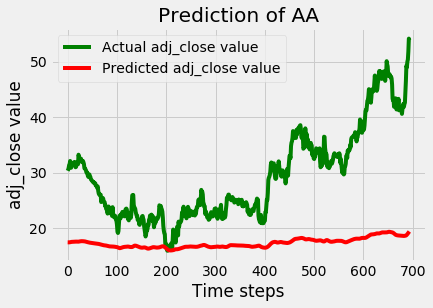

In [344]:
# Plotting graph
plotting_graph(Y, y_pred, 'AA')

## Calculate MSE on training data ##

In [345]:
# Evaluating our model
return_mse(Y,y_pred)

The mean squared error is 198.7291627242861.


# Predicting on Test Data #

In [346]:
# Selecting test set, consider index start from 2018 date object
test_data = dataset['2018':].sort_values('date')

In [347]:
stock = test_data.loc[test_data['ticker'] == 'AA']

In [348]:
stock.head()

,ticker,open,close,adj_close,low,high,volume
date,,,,,,,
2018-01-02,AA,54.060001,55.169998,55.169998,53.910000,55.220001,2928900
2018-01-03,AA,54.919998,54.500000,54.500000,52.959999,55.150002,4100000
2018-01-04,AA,54.810001,54.700001,54.700001,54.075001,55.430000,3555100
2018-01-05,AA,54.650002,54.090000,54.090000,53.410000,54.660000,3371400
2018-01-08,AA,53.959999,55.000000,55.000000,53.660000,56.150002,5028100


In [349]:
test_adj_close = stock[['adj_close']].values

In [350]:
Y_test = test_adj_close[60:]

In [351]:
p_sc.partial_fit(test_adj_close)
test_adj_close_scaled = p_sc.transform(test_adj_close)

In [352]:
x_test = []
for i in range(timesteps, len(test_adj_close_scaled)):
    x_test.append(test_adj_close_scaled[i-timesteps:i, 0])

In [353]:
X_test = np.array(x_test)

In [354]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [355]:
predicted_result = regressorGRU.predict(X_test)
y_test_pred = p_sc.inverse_transform(predicted_result)

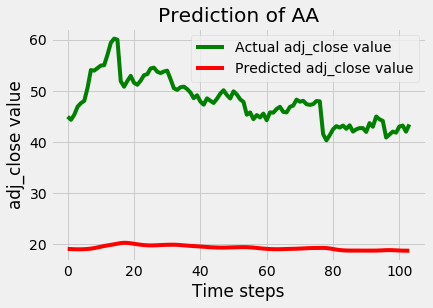

In [358]:
plotting_graph(Y_test, y_test_pred, 'AA')

## Calculate MSE on Test data##

In [357]:
# Evaluating our model
return_mse(Y_test,y_test_pred)

The mean squared error is 834.739806564987.
